# Marketing Campaign Analysis and Visualization


Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---

# 1. Importing Libraries and Setting Up Environment

---





In [ ]:
!pip install plotly ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:00


In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder


1. Load the Dataset

In [ ]:
file_path = '/content/drive/MyDrive/City_University /Year1/Visual_Analytics/marketing_and_product_performance.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

Campaign_ID   Product_ID    Budget  Clicks  Conversions  Revenue_Generated  \
0  CMP_RLSDVN  PROD_HBJFA3  41770.45    4946           73           15520.09   
1  CMP_JHHUE9  PROD_OE8YNJ       NaN     570          510           30866.17   
2  CMP_6SBOWN  PROD_4V8A08  22367.45    3546          265           32585.62   
3  CMP_Q31QCU  PROD_A1Q6ZB  29957.54    2573          781           95740.12   
4  CMP_AY0UTJ  PROD_F57N66  36277.19     818           79           81990.43   

    ROI  Customer_ID Subscription_Tier  Subscription_Length Flash_Sale_ID  \
0  1.94  CUST_1K7G39           Premium                    4  FLASH_1VFK5K   
1  0.76  CUST_0DWS6F           Premium                    4  FLASH_1M6COK   
2  1.41  CUST_BR2GST             Basic                    9  FLASH_J4PEON   
3  3.32  CUST_6TBY6K           Premium                   32  FLASH_1TOVXT   
4  3.53  CUST_XASI45          Standard                   29  FLASH_AOBHXL   

   Discount_Level  Units_Sold    Bundle_ID  Bundle_Price  \
0              43          34  BNDL_29U6W5        433.80   
1              28          97  BNDL_ULV60J        289.29   
2              51         160  BNDL_0HY0EF        462.87   
3              36         159  BNDL_AI09BC        334.16   
4              20          52  BNDL_R03ITT        371.67   

   Customer_Satisfaction_Post_Refund Common_Keywords  
0                                  4      Affordable  
1                                  2      Innovative  
2                                  4      Affordable  
3                                  1         Durable  
4                                  2      Affordable



---


 # 2. Data Pre-processing


---



In [ ]:
# Check the shape and structure of the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (10000, 17)


In [ ]:
# Summary statistics for numerical columns
print(df.describe())

             Budget        Clicks   Conversions  Revenue_Generated  \
count   9994.000000  10000.000000  10000.000000       10000.000000   
mean   25261.407801   2481.903600    498.978700       50038.627579   
std    14351.029255   1435.973623    289.479495       28545.702337   
min      500.440000     10.000000      1.000000        1002.080000   
25%    12784.730000   1225.750000    247.000000       25264.255000   
50%    25025.025000   2451.000000    499.000000       49513.815000   
75%    37922.215000   3723.000000    751.000000       74507.157500   
max    49999.630000   4999.000000    999.000000       99999.470000   

                ROI  Subscription_Length  Discount_Level    Units_Sold  \
count  10000.000000         10000.000000    10000.000000  10000.000000   
mean       2.756365            18.016500       39.421000    100.689600   
std        1.296901            10.149666       17.212925     57.074015   
min        0.500000             1.000000       10.000000      1.000000   

In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Campaign_ID                          0
Product_ID                           0
Budget                               6
Clicks                               0
Conversions                          0
Revenue_Generated                    0
ROI                                  0
Customer_ID                          0
Subscription_Tier                    2
Subscription_Length                  0
Flash_Sale_ID                        0
Discount_Level                       0
Units_Sold                           0
Bundle_ID                            0
Bundle_Price                         0
Customer_Satisfaction_Post_Refund    0
Common_Keywords                      6
dtype: int64


In [ ]:
# 4. Handle Missing Values

# For numerical columns
df['Budget'] = df['Budget'].fillna(df['Budget'].median())
df['Revenue_Generated'] = df['Revenue_Generated'].fillna(df['Revenue_Generated'].mean())


# For categorical columns
df['Subscription_Tier'] = df['Subscription_Tier'].fillna(df['Subscription_Tier'].mode()[0])
df['Common_Keywords'] = df['Common_Keywords'].fillna(df['Common_Keywords'].mode()[0])

In [ ]:
# Verify missing values again
print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 Campaign_ID                          0
Product_ID                           0
Budget                               0
Clicks                               0
Conversions                          0
Revenue_Generated                    0
ROI                                  0
Customer_ID                          0
Subscription_Tier                    0
Subscription_Length                  0
Flash_Sale_ID                        0
Discount_Level                       0
Units_Sold                           0
Bundle_ID                            0
Bundle_Price                         0
Customer_Satisfaction_Post_Refund    0
Common_Keywords                      0
dtype: int64


# Feature Engineering

In [ ]:
df['Profitability_Level'] = pd.cut(
    df['Revenue_Generated'] / df['Budget'],  # Revenue-to-Budget ratio
    bins=[-float('inf'), 1, 1.5, float('inf')],  # Define thresholds
    labels=['Not Profitable', 'Moderately Profitable', 'Highly Profitable']
)


In [ ]:
df

Campaign_ID   Product_ID     Budget  Clicks  Conversions  \
0     CMP_RLSDVN  PROD_HBJFA3  41770.450    4946           73   
1     CMP_JHHUE9  PROD_OE8YNJ  25025.025     570          510   
2     CMP_6SBOWN  PROD_4V8A08  22367.450    3546          265   
3     CMP_Q31QCU  PROD_A1Q6ZB  29957.540    2573          781   
4     CMP_AY0UTJ  PROD_F57N66  36277.190     818           79   
...          ...          ...        ...     ...          ...   
9995  CMP_U1BQY9  PROD_F204EM  49183.070      25          720   
9996  CMP_ZQDI7T  PROD_5313XR  38519.590    3503          799   
9997  CMP_SYFTKH  PROD_44T74P  21532.920    1140          428   
9998  CMP_FTAW8H  PROD_CPN4QT  35546.540    1078          409   
9999  CMP_3L1U09  PROD_W5MSRO   7179.690    1682          935   

      Revenue_Generated   ROI  Customer_ID Subscription_Tier  \
0              15520.09  1.94  CUST_1K7G39           Premium   
1              30866.17  0.76  CUST_0DWS6F           Premium   
2              32585.62  1.41  CUST_BR2GST             Basic   
3              95740.12  3.32  CUST_6TBY6K           Premium   
4              81990.43  3.53  CUST_XASI45          Standard   
...                 ...   ...          ...               ...   
9995           95399.69  4.61  CUST_K3F0GA           Premium   
9996           38999.04  3.31  CUST_SY9H51          Standard   
9997           39646.56  5.00  CUST_C6LMF4          Standard   
9998            6785.63  4.08  CUST_URFVAQ             Basic   
9999           96707.63  1.74  CUST_25UP1Z           Premium   

      Subscription_Length Flash_Sale_ID  Discount_Level  Units_Sold  \
0                       4  FLASH_1VFK5K              43          34   
1                       4  FLASH_1M6COK              28          97   
2                       9  FLASH_J4PEON              51         160   
3                      32  FLASH_1TOVXT              36         159   
4                      29  FLASH_AOBHXL              20          52   
...                   ...           ...             ...         ...   
9995                   18  FLASH_WOTOXI              25          95   
9996                   18  FLASH_3HIKX0              10           5   
9997                   19  FLASH_W3KMY9              37         191   
9998                   31  FLASH_L4UDXZ              59          73   
9999                    3  FLASH_ZGYPFO              68           4   

        Bundle_ID  Bundle_Price  Customer_Satisfaction_Post_Refund  \
0     BNDL_29U6W5        433.80                                  4   
1     BNDL_ULV60J        289.29                                  2   
2     BNDL_0HY0EF        462.87                                  4   
3     BNDL_AI09BC        334.16                                  1   
4     BNDL_R03ITT        371.67                                  2   
...           ...           ...                                ...   
9995  BNDL_6DN251        196.59                                  3   
9996  BNDL_24U1RG        461.12                                  2   
9997  BNDL_MIA2QO        248.20                                  3   
9998  BNDL_PHIE38        217.78                                  4   
9999  BNDL_H5CC7E        392.44                                  3   

     Common_Keywords    Profitability_Level  
0         Affordable         Not Profitable  
1         Innovative  Moderately Profitable  
2         Affordable  Moderately Profitable  
3            Durable      Highly Profitable  
4         Affordable      Highly Profitable  
...              ...                    ...  
9995      Affordable      Highly Profitable  
9996         Durable  Moderately Profitable  
9997         Stylish      Highly Profitable  
9998      Affordable         Not Profitable  
9999      Innovative      Highly Profitable  

[10000 rows x 18 columns]

# Feature Transformation

In [ ]:
# save the original Dataframe into a copy df before the feature transformation
df_copy = df.copy(deep=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Campaign_ID                        10000 non-null  object  
 1   Product_ID                         10000 non-null  object  
 2   Budget                             10000 non-null  float64 
 3   Clicks                             10000 non-null  int64   
 4   Conversions                        10000 non-null  int64   
 5   Revenue_Generated                  10000 non-null  float64 
 6   ROI                                10000 non-null  float64 
 7   Customer_ID                        10000 non-null  object  
 8   Subscription_Tier                  10000 non-null  object  
 9   Subscription_Length                10000 non-null  int64   
 10  Flash_Sale_ID                      10000 non-null  object  
 11  Discount_Level                     10000 n

In [ ]:
df.head()

Campaign_ID   Product_ID     Budget  Clicks  Conversions  Revenue_Generated  \
0  CMP_RLSDVN  PROD_HBJFA3  41770.450    4946           73           15520.09   
1  CMP_JHHUE9  PROD_OE8YNJ  25025.025     570          510           30866.17   
2  CMP_6SBOWN  PROD_4V8A08  22367.450    3546          265           32585.62   
3  CMP_Q31QCU  PROD_A1Q6ZB  29957.540    2573          781           95740.12   
4  CMP_AY0UTJ  PROD_F57N66  36277.190     818           79           81990.43   

    ROI  Customer_ID Subscription_Tier  Subscription_Length Flash_Sale_ID  \
0  1.94  CUST_1K7G39           Premium                    4  FLASH_1VFK5K   
1  0.76  CUST_0DWS6F           Premium                    4  FLASH_1M6COK   
2  1.41  CUST_BR2GST             Basic                    9  FLASH_J4PEON   
3  3.32  CUST_6TBY6K           Premium                   32  FLASH_1TOVXT   
4  3.53  CUST_XASI45          Standard                   29  FLASH_AOBHXL   

   Discount_Level  Units_Sold    Bundle_ID  Bundle_Price  \
0              43          34  BNDL_29U6W5        433.80   
1              28          97  BNDL_ULV60J        289.29   
2              51         160  BNDL_0HY0EF        462.87   
3              36         159  BNDL_AI09BC        334.16   
4              20          52  BNDL_R03ITT        371.67   

   Customer_Satisfaction_Post_Refund Common_Keywords    Profitability_Level  
0                                  4      Affordable         Not Profitable  
1                                  2      Innovative  Moderately Profitable  
2                                  4      Affordable  Moderately Profitable  
3                                  1         Durable      Highly Profitable  
4                                  2      Affordable      Highly Profitable

## Converting categorical columns to numerical

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Convert categorical columns to numerical
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df.head()

Campaign_ID  Product_ID     Budget  Clicks  Conversions  Revenue_Generated  \
0         7686        4765  41770.450    4946           73           15520.09   
1         5510        6722  25025.025     570          510           30866.17   
2         1879        1332  22367.450    3546          265           32585.62   
3         7258        2752  29957.540    2573          781           95740.12   
4         3124        4172  36277.190     818           79           81990.43   

    ROI  Customer_ID  Subscription_Tier  Subscription_Length  Flash_Sale_ID  \
0  1.94          440                  1                    4            501   
1  0.76          100                  1                    4            427   
2  1.41         3329                  0                    9           5305   
3  3.32         1943                  1                   32            488   
4  3.53         9244                  2                   29           2881   

   Discount_Level  Units_Sold  Bundle_ID  Bundle_Price  \
0              43          34        630        433.80   
1              28          97       8477        289.29   
2              51         160        138        462.87   
3              36         159       2925        334.16   
4              20          52       7439        371.67   

   Customer_Satisfaction_Post_Refund  Common_Keywords  Profitability_Level  
0                                  4                0                    2  
1                                  2                2                    1  
2                                  4                0                    1  
3                                  1                1                    0  
4                                  2                0                    0

## Identify and Handle Outliers

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to all columns in the DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Print the first few rows of the scaled DataFrame
print(df_scaled.head())


   Campaign_ID  Product_ID    Budget    Clicks  Conversions  \
0     0.768677    0.476548  0.833751  0.989377     0.072144   
1     0.551055    0.672267  0.495454  0.112247     0.510020   
2     0.187919    0.133213  0.441765  0.708759     0.264529   
3     0.725873    0.275228  0.595103  0.513730     0.781563   
4     0.312431    0.417242  0.722774  0.161956     0.078156   

   Revenue_Generated       ROI  Customer_ID  Subscription_Tier  \
0           0.146650  0.320000     0.044004                0.5   
1           0.301665  0.057778     0.010001                0.5   
2           0.319034  0.202222     0.332933                0.0   
3           0.956975  0.626667     0.194319                0.5   
4           0.818086  0.673333     0.924492                1.0   

   Subscription_Length  Flash_Sale_ID  Discount_Level  Units_Sold  Bundle_ID  \
0             0.088235       0.050105        0.559322    0.166667   0.063006   
1             0.088235       0.042704        0.305085    0.48484

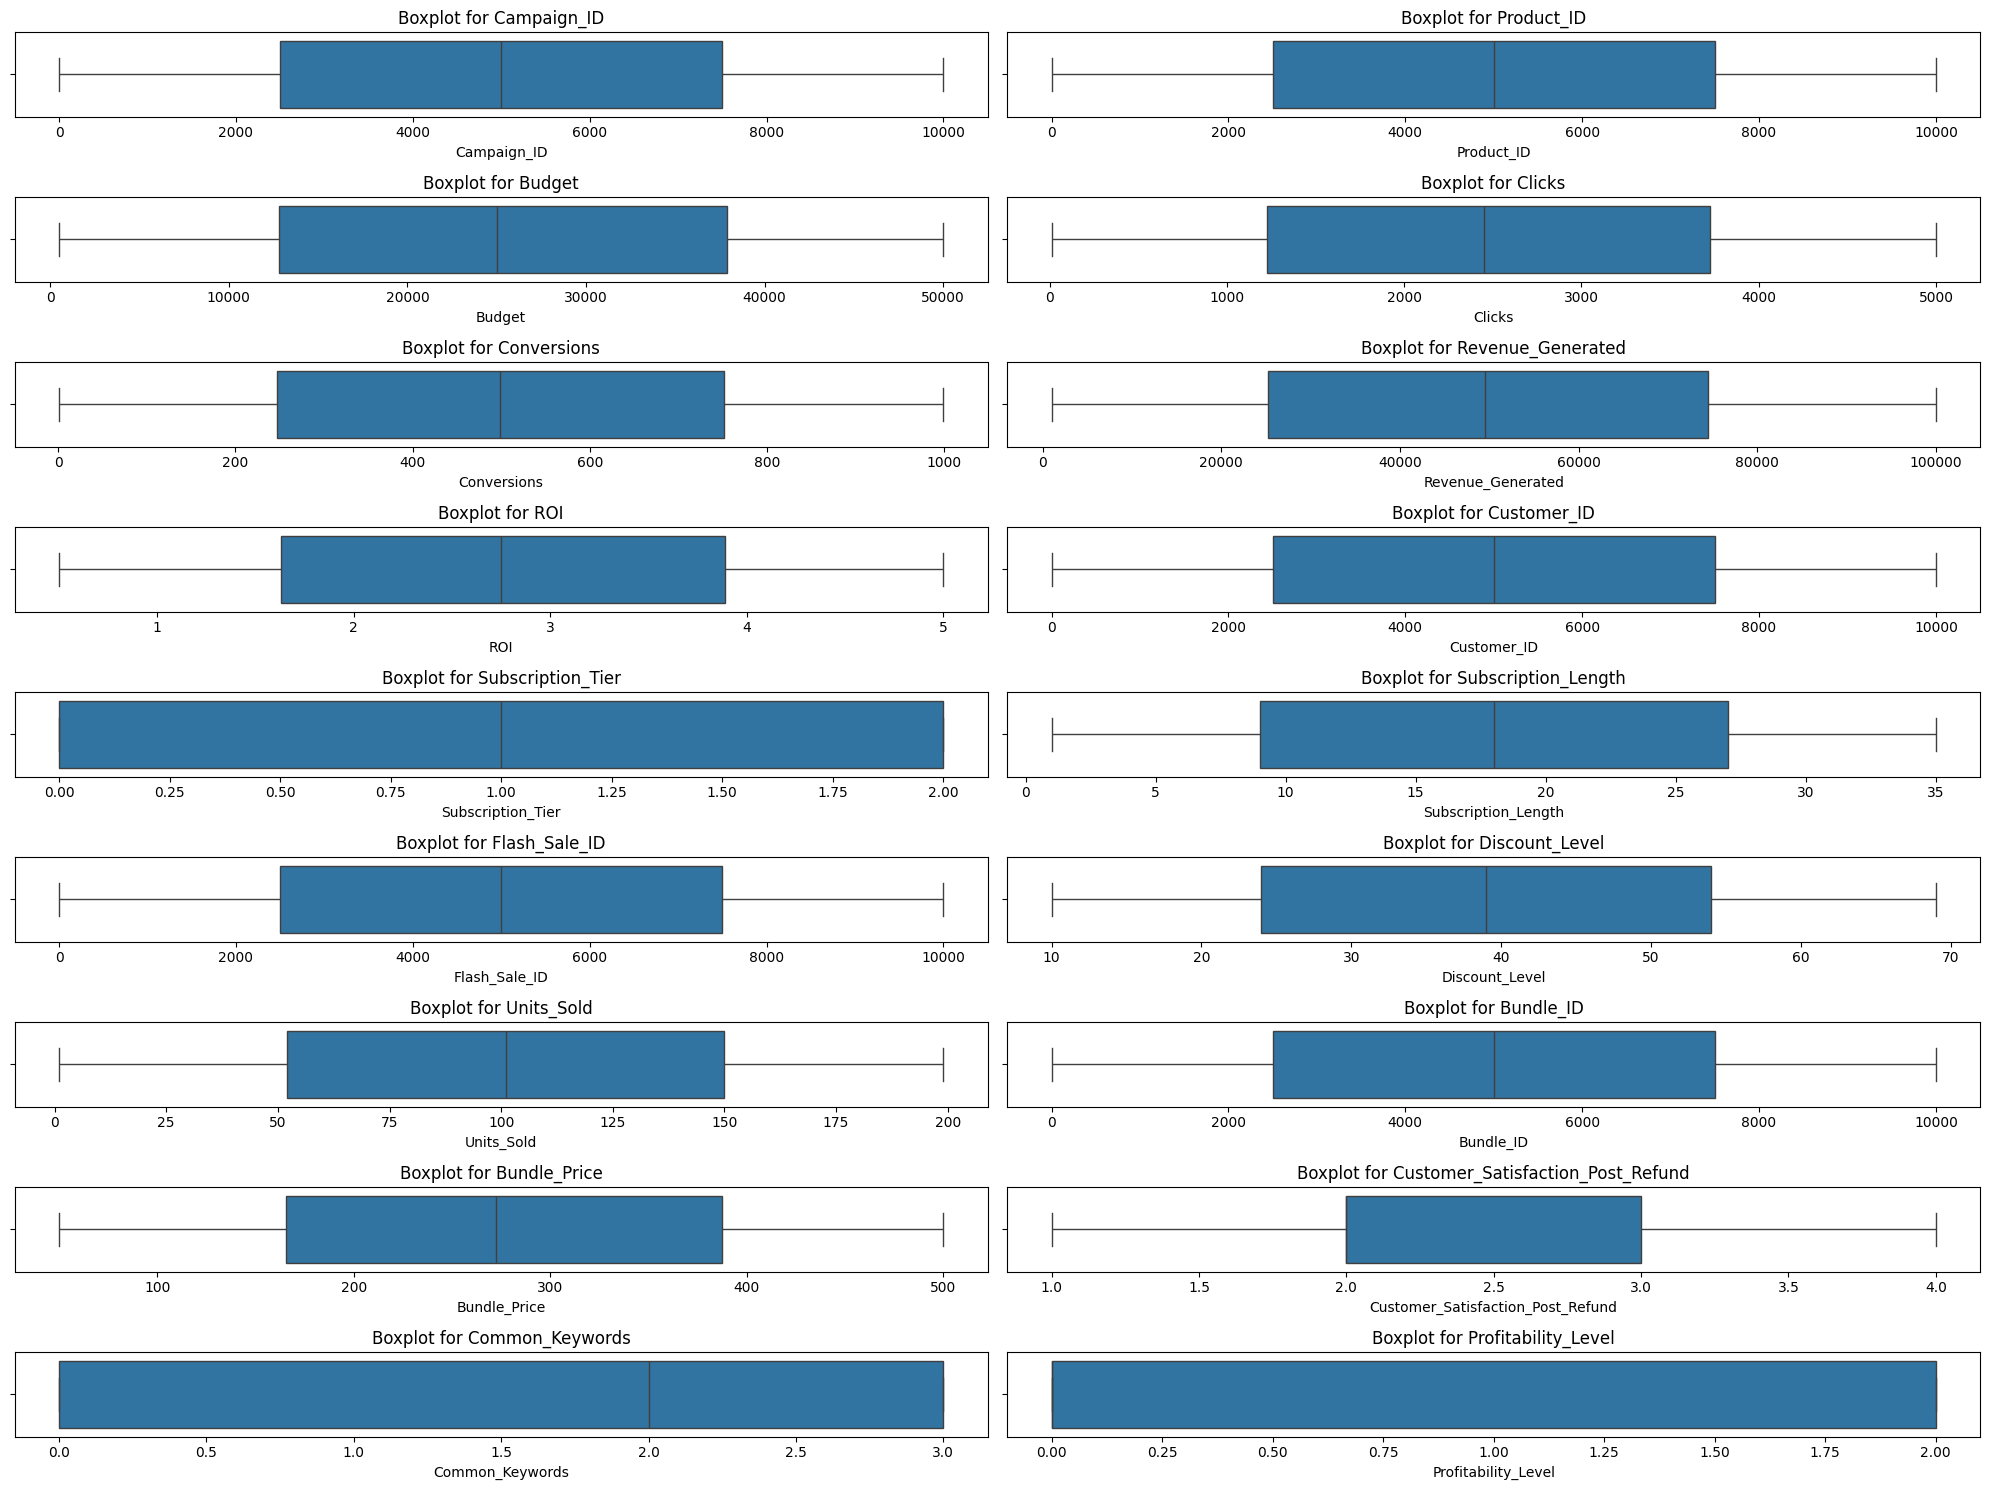

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all columns from the DataFrame
columns_to_plot = df.columns

# Define the number of columns for subplots
num_columns = 2
num_rows = len(columns_to_plot) // num_columns + (len(columns_to_plot) % num_columns > 0)

# Set up the figure and axes for subplots
figure, axis_list = plt.subplots(num_rows, num_columns, figsize=(20, 15))
axis_list = axis_list.flatten()  # Flatten the axes array for easier indexing

# Loop through all columns in the DataFrame and create a boxplot for each
for index, feature in enumerate(columns_to_plot):
    sns.boxplot(data=df, x=feature, ax=axis_list[index])
    axis_list[index].set_title(f'Boxplot for {feature}')

# Remove any extra, unused subplot axes
for extra_index in range(len(columns_to_plot), len(axis_list)):
    figure.delaxes(axis_list[extra_index])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
for col in df.columns:
    print(f"{col} unique values: {df[col].nunique()}")


Campaign_ID unique values: 10000
Product_ID unique values: 10000
Budget unique values: 9990
Clicks unique values: 4298
Conversions unique values: 999
Revenue_Generated unique values: 9997
ROI unique values: 451
Customer_ID unique values: 10000
Subscription_Tier unique values: 3
Subscription_Length unique values: 35
Flash_Sale_ID unique values: 10000
Discount_Level unique values: 60
Units_Sold unique values: 199
Bundle_ID unique values: 10000
Bundle_Price unique values: 8977
Customer_Satisfaction_Post_Refund unique values: 4
Common_Keywords unique values: 4
Profitability_Level unique values: 3


In [ ]:
print(df[df.columns].describe())


       Campaign_ID   Product_ID        Budget        Clicks   Conversions  \
count  10000.00000  10000.00000  10000.000000  10000.000000  10000.000000   
mean    4999.50000   4999.50000  25261.265971   2481.903600    498.978700   
std     2886.89568   2886.89568  14346.724038   1435.973623    289.479495   
min        0.00000      0.00000    500.440000     10.000000      1.000000   
25%     2499.75000   2499.75000  12791.472500   1225.750000    247.000000   
50%     4999.50000   4999.50000  25025.025000   2451.000000    499.000000   
75%     7499.25000   7499.25000  37917.430000   3723.000000    751.000000   
max     9999.00000   9999.00000  49999.630000   4999.000000    999.000000   

       Revenue_Generated           ROI  Customer_ID  Subscription_Tier  \
count       10000.000000  10000.000000  10000.00000        10000.00000   
mean        50038.627579      2.756365   4999.50000            0.98820   
std         28545.702337      1.296901   2886.89568            0.81959   
min       

## The normal boxplots show that the scaled data lacks major variance or extreme outliers, which is expected due to normalization.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 73.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


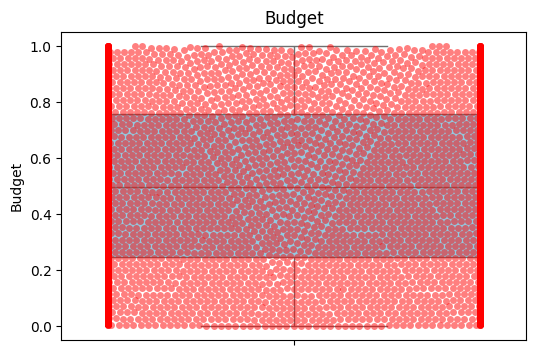

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 73.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


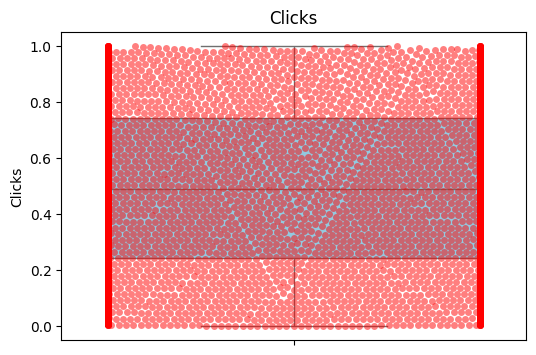

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 73.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


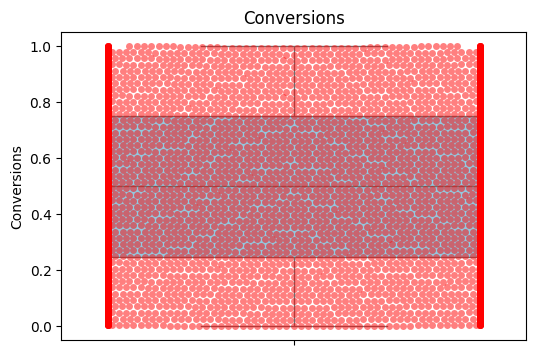

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


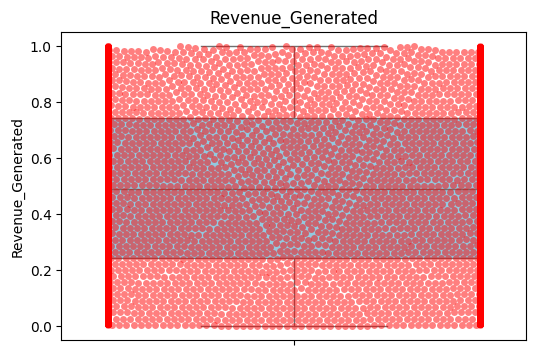

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 73.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 77.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


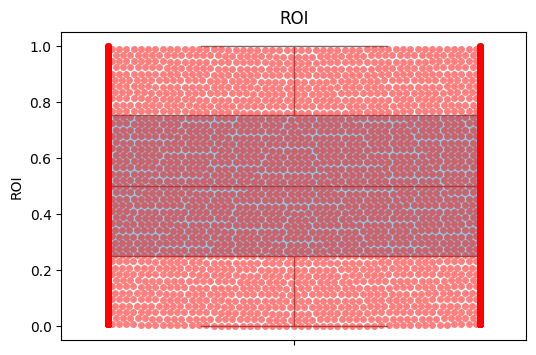

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


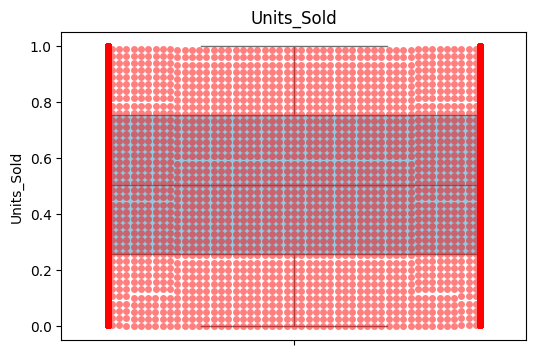

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


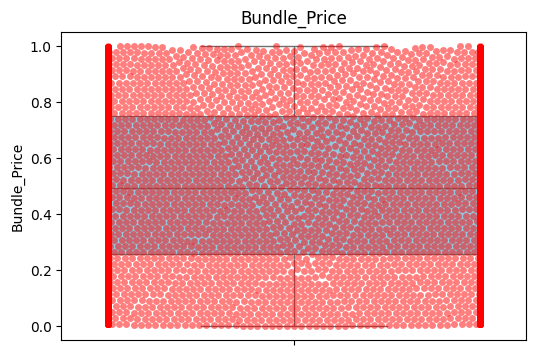

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 97.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 98.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


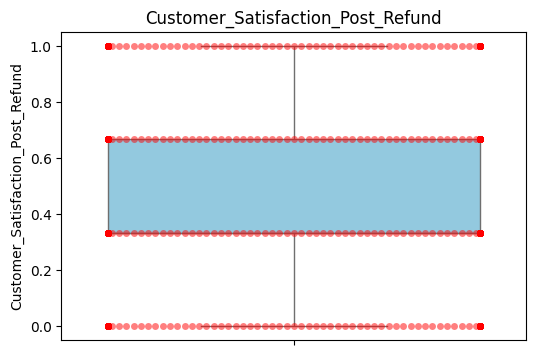

In [ ]:
for col in boxplot_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='skyblue')
    sns.swarmplot(y=df[col], color='red', alpha=0.5)
    plt.title(col)
    plt.show()

## The red dots from swarmplots provide more detailed insights into individual data point distribution, ensuring the scaled data maintains the integrity of the original spread.

In [ ]:
# # Remove outliers using the IQR method
# Q1 = df['Budget'].quantile(0.25)
# Q3 = df['Budget'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df = df[(df['Budget'] >= lower_bound) & (df['Budget'] <= upper_bound)]

# Feature Engineering

In [ ]:
df.head()

Campaign_ID  Product_ID     Budget  Clicks  Conversions  Revenue_Generated  \
0         7686        4765  41770.450    4946           73           15520.09   
1         5510        6722  25025.025     570          510           30866.17   
2         1879        1332  22367.450    3546          265           32585.62   
3         7258        2752  29957.540    2573          781           95740.12   
4         3124        4172  36277.190     818           79           81990.43   

    ROI  Customer_ID  Subscription_Tier  Subscription_Length  Flash_Sale_ID  \
0  1.94          440                  1                    4            501   
1  0.76          100                  1                    4            427   
2  1.41         3329                  0                    9           5305   
3  3.32         1943                  1                   32            488   
4  3.53         9244                  2                   29           2881   

   Discount_Level  Units_Sold  Bundle_ID  Bundle_Price  \
0              43          34        630        433.80   
1              28          97       8477        289.29   
2              51         160        138        462.87   
3              36         159       2925        334.16   
4              20          52       7439        371.67   

   Customer_Satisfaction_Post_Refund  Common_Keywords  Profitability_Level  
0                                  4                0                    2  
1                                  2                2                    1  
2                                  4                0                    1  
3                                  1                1                    0  
4                                  2                0                    0

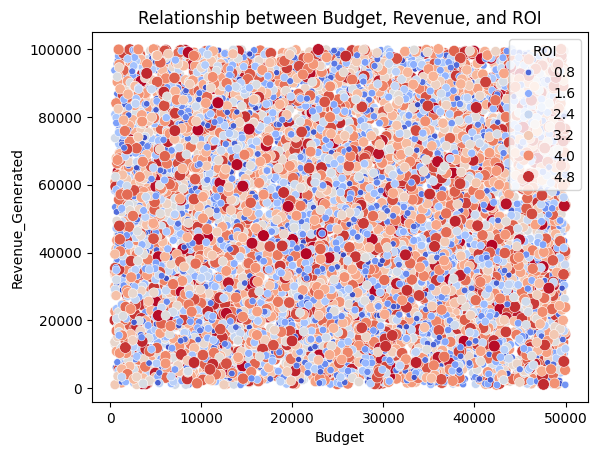

In [ ]:
sns.scatterplot(data=df, x='Budget', y='Revenue_Generated', hue='ROI', size='ROI', palette='coolwarm')
plt.title('Relationship between Budget, Revenue, and ROI')
plt.show()


In [ ]:
df

Campaign_ID  Product_ID     Budget  Clicks  Conversions  \
0            7686        4765  41770.450    4946           73   
1            5510        6722  25025.025     570          510   
2            1879        1332  22367.450    3546          265   
3            7258        2752  29957.540    2573          781   
4            3124        4172  36277.190     818           79   
...           ...         ...        ...     ...          ...   
9995         8314        4134  49183.070      25          720   
9996         9926        1398  38519.590    3503          799   
9997         8006        1145  21532.920    1140          428   
9998         4498        3468  35546.540    1078          409   
9999         1045        8956   7179.690    1682          935   

      Revenue_Generated   ROI  Customer_ID  Subscription_Tier  \
0              15520.09  1.94          440                  1   
1              30866.17  0.76          100                  1   
2              32585.62  1.41         3329                  0   
3              95740.12  3.32         1943                  1   
4              81990.43  3.53         9244                  2   
...                 ...   ...          ...                ...   
9995           95399.69  4.61         5638                  1   
9996           38999.04  3.31         8066                  2   
9997           39646.56  5.00         3425                  2   
9998            6785.63  4.08         8553                  0   
9999           96707.63  1.74          625                  1   

      Subscription_Length  Flash_Sale_ID  Discount_Level  Units_Sold  \
0                       4            501              43          34   
1                       4            427              28          97   
2                       9           5305              51         160   
3                      32            488              36         159   
4                      29           2881              20          52   
...                   ...            ...             ...         ...   
9995                   18           9026              25          95   
9996                   18            919              10           5   
9997                   19           8877              37         191   
9998                   31           5831              59          73   
9999                    3           9846              68           4   

      Bundle_ID  Bundle_Price  Customer_Satisfaction_Post_Refund  \
0           630        433.80                                  4   
1          8477        289.29                                  2   
2           138        462.87                                  4   
3          2925        334.16                                  1   
4          7439        371.67                                  2   
...         ...           ...                                ...   
9995       1805        196.59                                  3   
9996        586        461.12                                  2   
9997       6223        248.20                                  3   
9998       7038        217.78                                  4   
9999       4732        392.44                                  3   

      Common_Keywords    Profitability_Level  
0                   0         Not Profitable  
1                   2  Moderately Profitable  
2                   0  Moderately Profitable  
3                   1      Highly Profitable  
4                   0      Highly Profitable  
...               ...                    ...  
9995                0      Highly Profitable  
9996                1  Moderately Profitable  
9997                3      Highly Profitable  
9998                0         Not Profitable  
9999                2      Highly Profitable  

[10000 rows x 18 columns]

In [ ]:
df_copy

Campaign_ID   Product_ID     Budget  Clicks  Conversions  \
0     CMP_RLSDVN  PROD_HBJFA3  41770.450    4946           73   
1     CMP_JHHUE9  PROD_OE8YNJ  25025.025     570          510   
2     CMP_6SBOWN  PROD_4V8A08  22367.450    3546          265   
3     CMP_Q31QCU  PROD_A1Q6ZB  29957.540    2573          781   
4     CMP_AY0UTJ  PROD_F57N66  36277.190     818           79   
...          ...          ...        ...     ...          ...   
9995  CMP_U1BQY9  PROD_F204EM  49183.070      25          720   
9996  CMP_ZQDI7T  PROD_5313XR  38519.590    3503          799   
9997  CMP_SYFTKH  PROD_44T74P  21532.920    1140          428   
9998  CMP_FTAW8H  PROD_CPN4QT  35546.540    1078          409   
9999  CMP_3L1U09  PROD_W5MSRO   7179.690    1682          935   

      Revenue_Generated   ROI  Customer_ID Subscription_Tier  \
0              15520.09  1.94  CUST_1K7G39           Premium   
1              30866.17  0.76  CUST_0DWS6F           Premium   
2              32585.62  1.41  CUST_BR2GST             Basic   
3              95740.12  3.32  CUST_6TBY6K           Premium   
4              81990.43  3.53  CUST_XASI45          Standard   
...                 ...   ...          ...               ...   
9995           95399.69  4.61  CUST_K3F0GA           Premium   
9996           38999.04  3.31  CUST_SY9H51          Standard   
9997           39646.56  5.00  CUST_C6LMF4          Standard   
9998            6785.63  4.08  CUST_URFVAQ             Basic   
9999           96707.63  1.74  CUST_25UP1Z           Premium   

      Subscription_Length Flash_Sale_ID  Discount_Level  Units_Sold  \
0                       4  FLASH_1VFK5K              43          34   
1                       4  FLASH_1M6COK              28          97   
2                       9  FLASH_J4PEON              51         160   
3                      32  FLASH_1TOVXT              36         159   
4                      29  FLASH_AOBHXL              20          52   
...                   ...           ...             ...         ...   
9995                   18  FLASH_WOTOXI              25          95   
9996                   18  FLASH_3HIKX0              10           5   
9997                   19  FLASH_W3KMY9              37         191   
9998                   31  FLASH_L4UDXZ              59          73   
9999                    3  FLASH_ZGYPFO              68           4   

        Bundle_ID  Bundle_Price  Customer_Satisfaction_Post_Refund  \
0     BNDL_29U6W5        433.80                                  4   
1     BNDL_ULV60J        289.29                                  2   
2     BNDL_0HY0EF        462.87                                  4   
3     BNDL_AI09BC        334.16                                  1   
4     BNDL_R03ITT        371.67                                  2   
...           ...           ...                                ...   
9995  BNDL_6DN251        196.59                                  3   
9996  BNDL_24U1RG        461.12                                  2   
9997  BNDL_MIA2QO        248.20                                  3   
9998  BNDL_PHIE38        217.78                                  4   
9999  BNDL_H5CC7E        392.44                                  3   

     Common_Keywords  
0         Affordable  
1         Innovative  
2         Affordable  
3            Durable  
4         Affordable  
...              ...  
9995      Affordable  
9996         Durable  
9997         Stylish  
9998      Affordable  
9999      Innovative  

[10000 rows x 17 columns]

# Visualizations of Dataset Properties

Distribution Analysis:

Histogram with KDE: Use for understanding the distribution of numerical features like ROI, Budget, and Revenue. Include density curves for better insight.

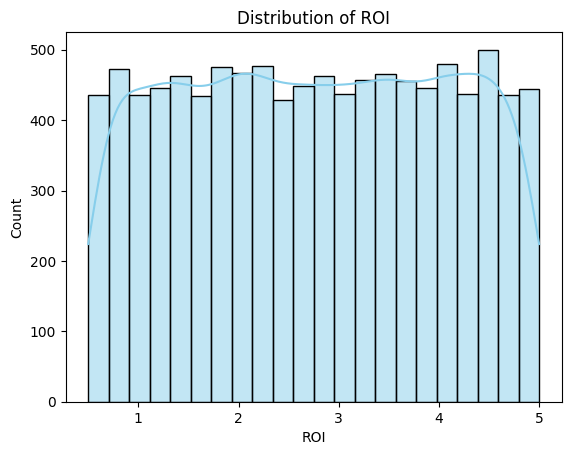

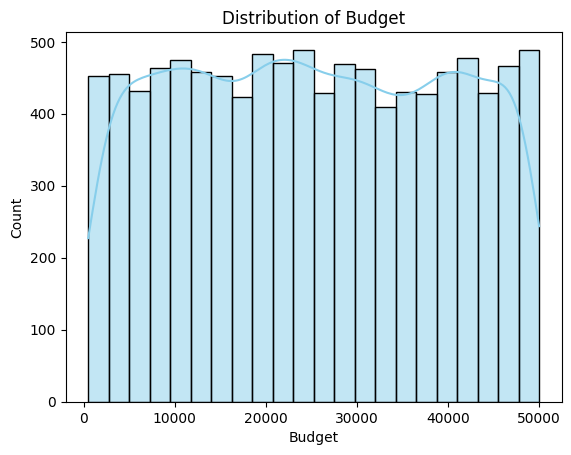

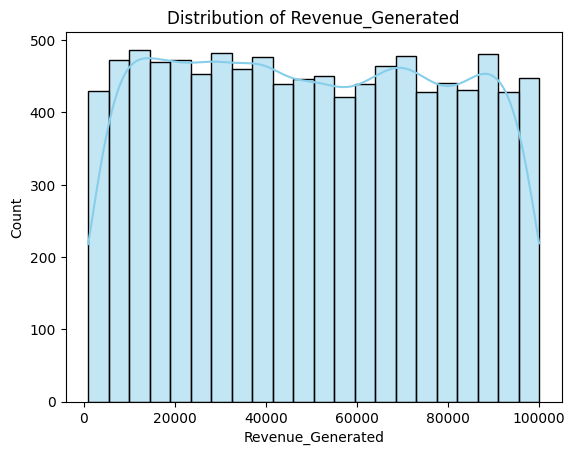

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['ROI', 'Budget', 'Revenue_Generated']:
    sns.histplot(df[col], kde=True, color='skyblue', line_kws={'color': 'red'})  # Red KDE line, skyblue bars
    plt.title(f'Distribution of {col}')
    plt.show()



In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"


In [ ]:
import plotly.express as px

# Basic analysis: Scatter plot of Budget vs Revenue Generated
fig1 = px.scatter(
    df_copy,
    x="Budget",
    y="Revenue_Generated",
    color="Subscription_Tier",
    size="Units_Sold",
    hover_data=["Campaign_ID", "Discount_Level"],
    title="Budget vs Revenue Generated by Subscription Tier"
)

# Show the plot
fig1.show(renderer='colab')


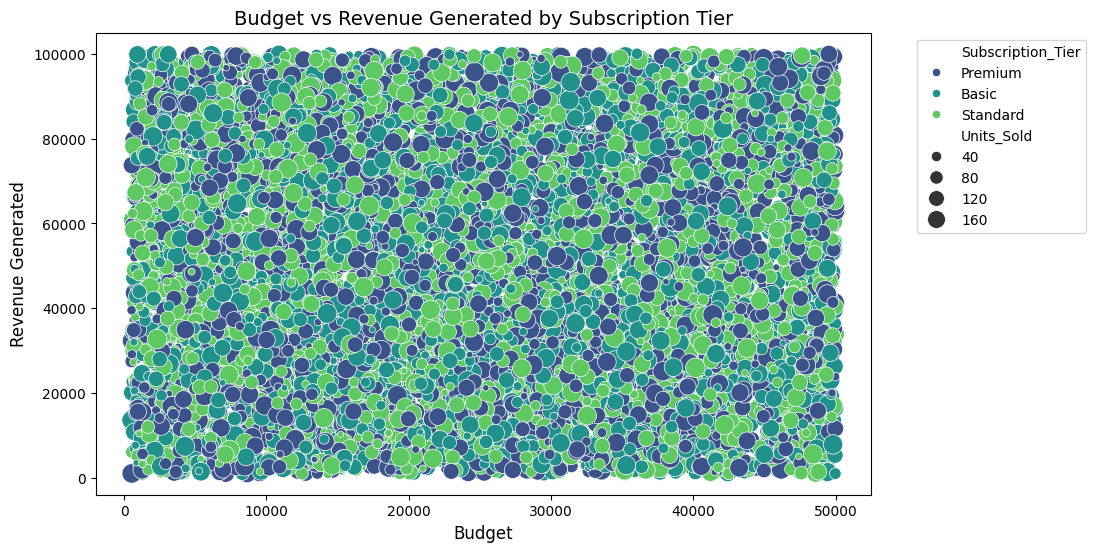

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_copy,
    x="Budget",
    y="Revenue_Generated",
    hue="Subscription_Tier",  # Color based on Subscription Tier
    size="Units_Sold",       # Size based on Units Sold
    sizes=(20, 200),         # Scale of point sizes
    palette="viridis"        # Color palette
)

# Add labels and title
plt.title("Budget vs Revenue Generated by Subscription Tier", fontsize=14)
plt.xlabel("Budget", fontsize=12)
plt.ylabel("Revenue Generated", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


In [ ]:
# Revenue generated by ROI and satisfaction
fig2 = px.scatter(
    df_copy,
    x="ROI",
    y="Revenue_Generated",
    color="Customer_Satisfaction_Post_Refund",
    size="Clicks",
    hover_data=["Campaign_ID", "Common_Keywords"],
    title="Revenue Generated by ROI and Customer Satisfaction"
)

# Render the advanced scatter plot
fig2.show(renderer='colab')

In [ ]:
#  Bar plot of Units Sold by Subscription Tier
fig3 = px.bar(
    df_copy,
    x="Subscription_Tier",
    y="Units_Sold",
    color="Common_Keywords",
    title="Units Sold by Subscription Tier and Campaign Keywords",
    text="Units_Sold"
)

# Render the bar plot
fig3.show(renderer='colab')

<ipython-input-121-d7a76bcacd0d>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




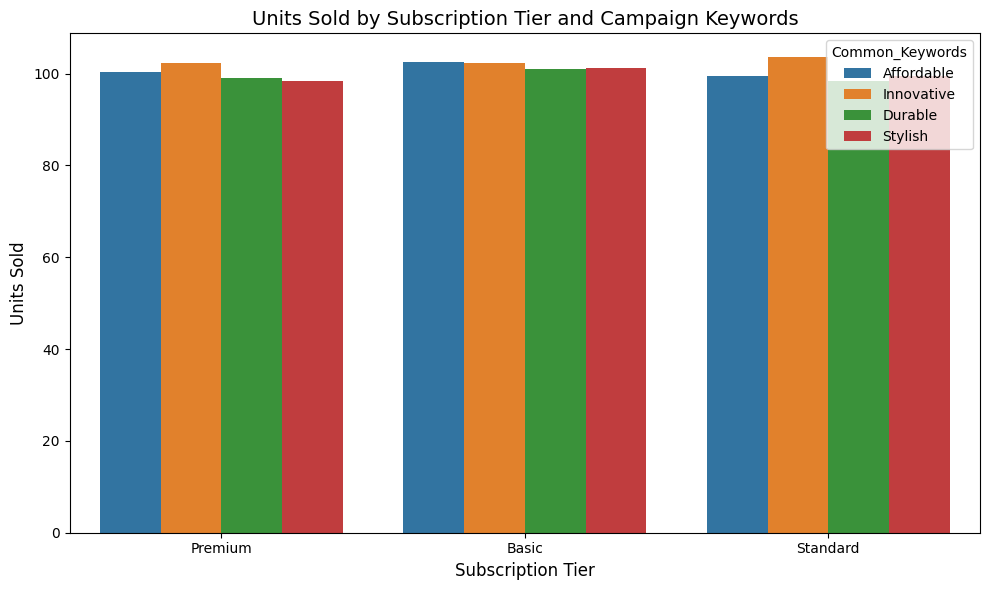

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(
    data=df_copy,
    x="Subscription_Tier",
    y="Units_Sold",
    hue="Common_Keywords",  # Color bars by Common_Keywords
    ci=None  # Disables confidence intervals
)

# Add title and labels
plt.title("Units Sold by Subscription Tier and Campaign Keywords", fontsize=14)
plt.xlabel("Subscription Tier", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-122-5174a803799e>:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



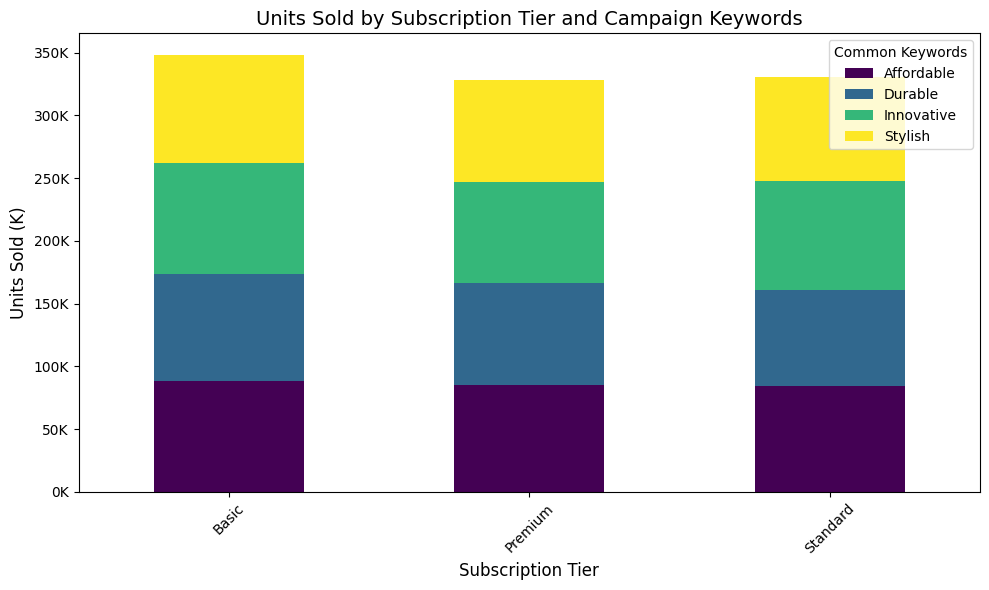

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by Subscription_Tier and Common_Keywords, and sum Units_Sold
grouped_df = df_copy.groupby(["Subscription_Tier", "Common_Keywords"])["Units_Sold"].sum().unstack()

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df.plot(kind="bar", stacked=True, ax=ax, colormap="viridis")  # Stacked bar chart with color map

# Add title and labels
ax.set_title("Units Sold by Subscription Tier and Campaign Keywords", fontsize=14)
ax.set_xlabel("Subscription Tier", fontsize=12)
ax.set_ylabel("Units Sold (K)", fontsize=12)

# Format y-axis to display values in 'K'
ax.set_yticklabels([f'{int(x/1000)}K' for x in ax.get_yticks()])

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adjust legend
ax.legend(title="Common Keywords", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
fig_bar = px.bar(
    df_copy,
    x="Subscription_Tier",
    y="Revenue_Generated",
    color="Common_Keywords",
    title="Total Revenue Generated by Subscription Tier",
    text="Revenue_Generated"
)
fig_bar.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_bar.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig_bar.show(renderer='colab')


<ipython-input-124-1fed864471c4>:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



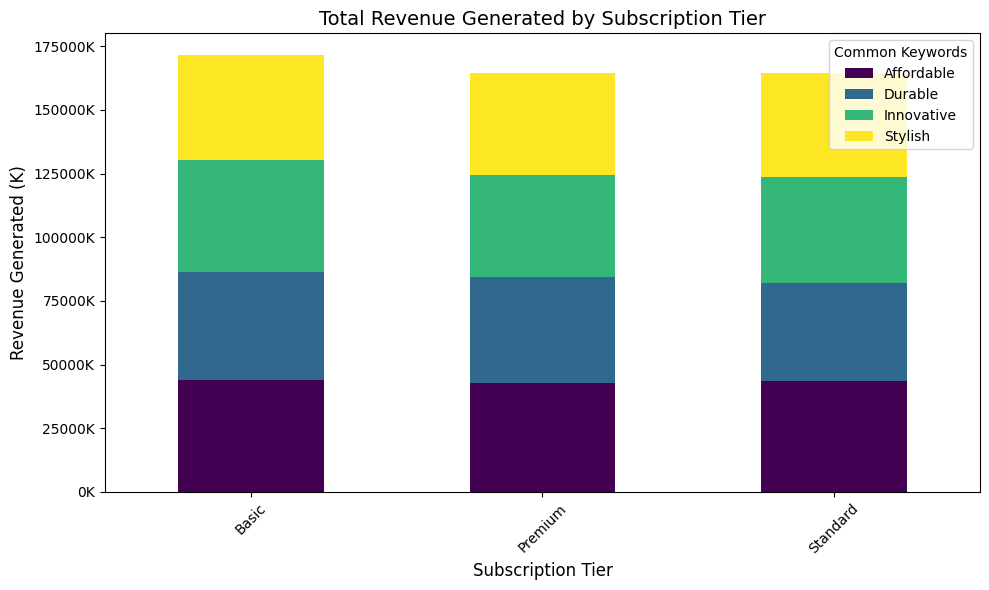

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by Subscription_Tier and Common_Keywords, and sum Revenue_Generated
grouped_df = df_copy.groupby(["Subscription_Tier", "Common_Keywords"])["Revenue_Generated"].sum().unstack()

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df.plot(kind="bar", stacked=True, ax=ax, colormap="viridis")  # Stacked bar chart with color map

# Add title and labels
ax.set_title("Total Revenue Generated by Subscription Tier", fontsize=14)
ax.set_xlabel("Subscription Tier", fontsize=12)
ax.set_ylabel("Revenue Generated (K)", fontsize=12)

# Format y-axis to display values in 'K'
ax.set_yticklabels([f'{int(x/1000)}K' for x in ax.get_yticks()])

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adjust legend
ax.legend(title="Common Keywords", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
fig_pie = px.pie(
    df,
    names="Subscription_Tier",
    values="Units_Sold",
    title="Proportion of Units Sold by Subscription Tier",
    color="Subscription_Tier"
)
fig_pie.show(renderer='colab')

<ipython-input-126-4f808c1dc69d>:17: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




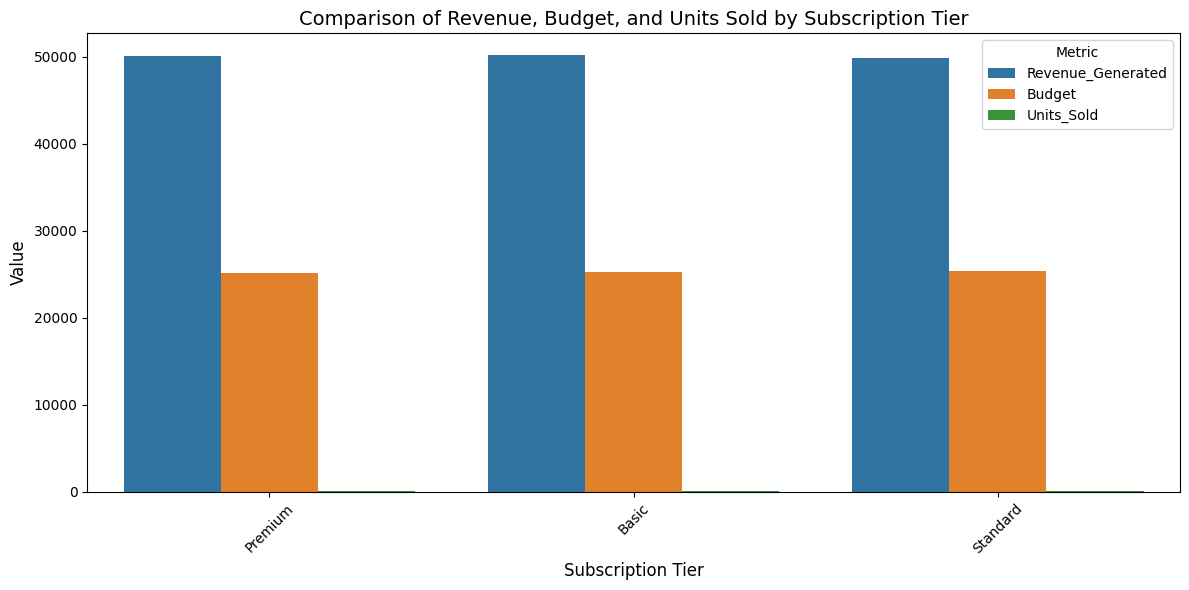

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the data
df_melted = df_copy.melt(
    id_vars=["Subscription_Tier"],
    value_vars=["Revenue_Generated", "Budget", "Units_Sold"],
    var_name="Metric",
    value_name="Value"
)

# Set the plot size
plt.figure(figsize=(12, 6))

# Create a grouped bar plot
sns.barplot(
    data=df_melted,
    x="Subscription_Tier",
    y="Value",
    hue="Metric",  # Group by Metric
    ci=None  # Disable confidence intervals
)

# Add title and labels
plt.title("Comparison of Revenue, Budget, and Units Sold by Subscription Tier", fontsize=14)
plt.xlabel("Subscription Tier", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adjust the legend
plt.legend(title="Metric", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Create a Sankey diagram to visualize flows between Subscription Tier and Campaign Keywords
fig_sankey = go.Figure(
    data=[
        go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=["Premium", "Standard", "Basic", "Affordable", "Innovative", "Durable"],
            ),
            link=dict(
                source=[0, 0, 1, 2, 2],  # Indices of source nodes
                target=[3, 4, 3, 3, 5],  # Indices of target nodes
                value=[2, 1, 1, 2, 1],   # Values of the flows
            ),
        )
    ]
)

fig_sankey.update_layout(title_text="Sankey Diagram of Subscription Tier and Campaign Keywords", font_size=10)
fig_sankey.show(renderer='colab')

In [ ]:
import plotly.express as px
import numpy as np

fig_treemap = px.treemap(
    df_copy,
    path=["Subscription_Tier", "Common_Keywords"],
    values="Revenue_Generated",
    title="Treemap of Revenue Generated by Subscription Tier and Keywords"
)
fig_treemap.show(renderer='colab')

In [ ]:
fig_sunburst = px.sunburst(
    df,
    path=["Subscription_Tier", "Common_Keywords"],
    values="Units_Sold",
    title="Sunburst Chart of Units Sold by Subscription Tier and Keywords"
)
fig_sunburst.show(renderer='colab')

In [ ]:
fig_box = px.box(
    df,
    x="Subscription_Tier",
    y="ROI",
    color="Subscription_Tier",
    title="Box Plot of ROI by Subscription Tier"
)
fig_box.show(renderer='colab')

In [ ]:
fig_parallel = px.parallel_coordinates(
    df,
    dimensions=["Budget", "Clicks", "Conversions", "Revenue_Generated", "ROI"],
    color="ROI",
    title="Parallel Coordinates of Campaign Performance"
)
fig_parallel.show(renderer='colab')

In [ ]:
df.head()


Campaign_ID  Product_ID     Budget  Clicks  Conversions  Revenue_Generated  \
0         7686        4765  41770.450    4946           73           15520.09   
1         5510        6722  25025.025     570          510           30866.17   
2         1879        1332  22367.450    3546          265           32585.62   
3         7258        2752  29957.540    2573          781           95740.12   
4         3124        4172  36277.190     818           79           81990.43   

    ROI  Customer_ID  Subscription_Tier  Subscription_Length  Flash_Sale_ID  \
0  1.94          440                  1                    4            501   
1  0.76          100                  1                    4            427   
2  1.41         3329                  0                    9           5305   
3  3.32         1943                  1                   32            488   
4  3.53         9244                  2                   29           2881   

   Discount_Level  Units_Sold  Bundle_ID  Bundle_Price  \
0              43          34        630        433.80   
1              28          97       8477        289.29   
2              51         160        138        462.87   
3              36         159       2925        334.16   
4              20          52       7439        371.67   

   Customer_Satisfaction_Post_Refund  Common_Keywords  Is_Profitable  
0                                  4                0              1  
1                                  2                2              1  
2                                  4                0              1  
3                                  1                1              1  
4                                  2                0              1

In [ ]:
fig_histogram = px.histogram(
    df,
    x="Revenue_Generated",
    nbins=10,
    title="Histogram of Revenue Generated"
)
fig_histogram.show(renderer='colab')

In [ ]:
numeric_columns = ["Budget", "Clicks", "Conversions", "Revenue_Generated", "ROI", "Units_Sold", "Bundle_Price"]
correlation_matrix = df[numeric_columns].corr()
fig_heatmap = px.imshow(
    correlation_matrix,
    text_auto=True,
    title="Heatmap of Correlation Matrix"
)
fig_heatmap.show(renderer='colab')

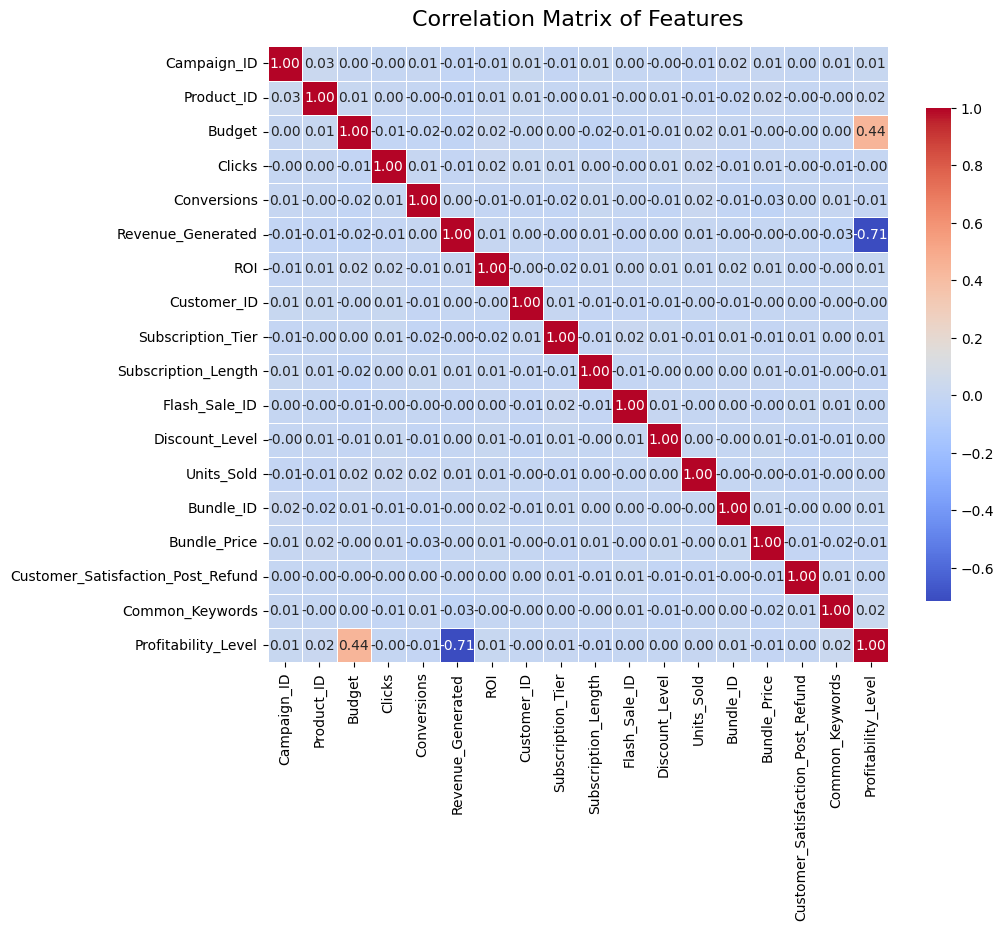

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the figure size and plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}  # Adjust color bar size
)
# Add a title for clarity
plt.title('Correlation Matrix of Features', fontsize=16, pad=15)

# Show the plot
plt.show()


In [ ]:
fig_facet = px.scatter(
    df,
    x="Budget",
    y="Revenue_Generated",
    facet_col="Subscription_Tier",
    color="Common_Keywords",
    title="Facet Grid: Revenue vs Budget by Subscription Tier"
)
fig_facet.show(renderer='colab')



---

# Modelling

---



In [ ]:
from sklearn.model_selection import train_test_split

# Set the target variable as 'is_fraud'
y_target = df['Profitability_Level']

# Drop the target variable 'is_fraud' to use all other columns as features
X_features = df.drop(columns=['Profitability_Level'], axis=1)

# Split the dataset into training and testing sets
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(
    X_features, y_target, test_size=0.2, stratify=y_target, random_state=97
)

# Print the shape of the training and testing datasets
print(f"X_train_data shape: {X_train_data.shape}")
print(f"X_test_data shape: {X_test_data.shape}")
print(f"y_train_data shape: {y_train_data.shape}")
print(f"y_test_data shape: {y_test_data.shape}")


X_train_data shape: (8000, 17)
X_test_data shape: (2000, 17)
y_train_data shape: (8000,)
y_test_data shape: (2000,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

## Use of MinMaxScaler to Scale data
scaler = MinMaxScaler()
X_train_data = scaler.fit_transform(X_train_data)
X_test_data = scaler.transform(X_test_data)

In [ ]:
from sklearn.metrics import classification_report, recall_score, roc_auc_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_classification_model(classifier, train_features, test_features, train_labels, test_labels):
    # Train the model on the training data
    classifier.fit(train_features, train_labels)

    # Predict on the test data
    predictions = classifier.predict(test_features)

    # Print classification report
    print("\nClassification Report: \n", classification_report(test_labels, predictions))

    # Compute and display evaluation metrics for multiclass
    recall = recall_score(test_labels, predictions, average='weighted')
    f1 = f1_score(test_labels, predictions, average='weighted')
    roc_auc = roc_auc_score(test_labels, classifier.predict_proba(test_features), multi_class='ovr', average='weighted')

    print(f"Recall Score (weighted): {recall:.2f}")
    print(f"F1-Score (weighted): {f1:.2f}")
    print(f"AUC Score (weighted, OVR): {roc_auc:.2f}")
    print('')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(test_labels, predictions, labels=classifier.classes_)

    # Display confusion matrix
    matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=classifier.classes_)
    matrix_display.plot()
    plt.show()

    # ROC curve is optional for multiclass, as it requires additional setup
    if len(classifier.classes_) == 2:  # Only for binary classification
        predicted_probabilities = classifier.predict_proba(test_features)[:, 1]
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, predicted_probabilities)
        roc_auc_value = auc(false_positive_rate, true_positive_rate)

        # Plot ROC curve
        plt.figure()
        plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_value:0.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("Skipping ROC Curve as this is a multiclass problem.")


Evaluating Random Forest Classifier


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1246
           1       0.95      0.83      0.88       253
           2       0.97      0.98      0.97       501

    accuracy                           0.97      2000
   macro avg       0.96      0.94      0.95      2000
weighted avg       0.97      0.97      0.97      2000

Recall Score (weighted): 0.97
F1-Score (weighted): 0.97
AUC Score (weighted, OVR): 1.00



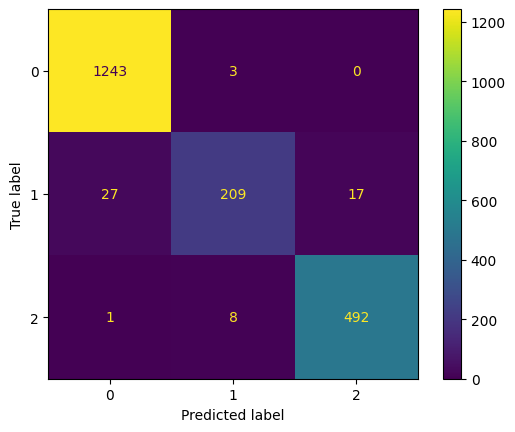

Skipping ROC Curve as this is a multiclass problem.


In [ ]:
# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Print heading for evaluation
print(f'Evaluating Random Forest Classifier\n')

# Evaluate the model using the fixed evaluation function
evaluate_classification_model(random_forest_classifier, X_train_data, X_test_data, y_train_data, y_test_data)


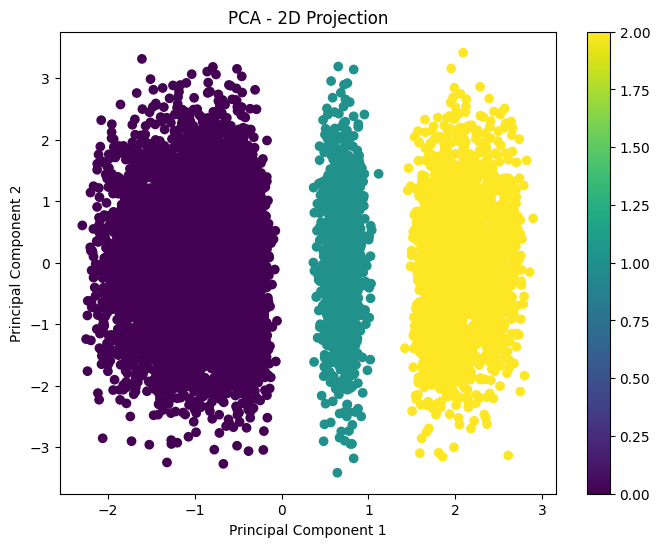

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 2: Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 components for 2D visualization
X_pca = pca.fit_transform(X_scaled)

# Step 3: Visualize the 2D projection of the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Profitability_Level'], cmap='viridis')  # Adjust 'target' to your label column
plt.colorbar()
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# If you want a 3D plot, use PCA(n_components=3) and visualize using a 3D scatter plot.


In [ ]:
# Check the loadings (how each original feature contributes to each PC)
loadings = pca.components_
print(loadings)


[[ 1.93882814e-02  3.21126252e-02  3.79983335e-01 -2.81269009e-03
  -1.46572683e-02 -5.99272690e-01  1.14316880e-02 -2.07349807e-03
   1.16460559e-02 -2.00787064e-02  6.31901722e-04 -3.58449708e-03
   2.03793735e-03  1.52269907e-02 -2.52377594e-03  2.92598271e-03
   4.03092389e-02  7.01635403e-01]
 [ 4.98980372e-02  2.61910624e-01  1.45039206e-01  2.17723704e-01
  -3.18698712e-01  8.75760015e-02  3.98464769e-01  4.48824217e-03
  -1.09972016e-01  1.10318859e-01 -1.64645611e-01  3.08685644e-01
   5.54254181e-02  9.87362682e-02  5.03077127e-01 -2.41372566e-01
  -3.48724154e-01 -2.12461877e-03]]


In [ ]:
# Print the explained variance ratio of each component
print(pca.explained_variance_ratio_)


[0.10291679 0.05932052]


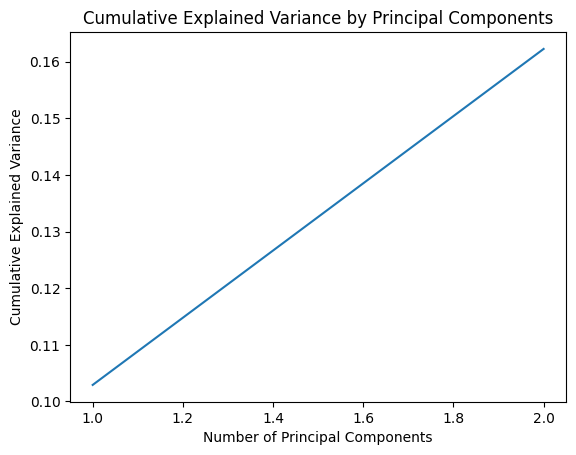

In [ ]:
import matplotlib.pyplot as plt

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()


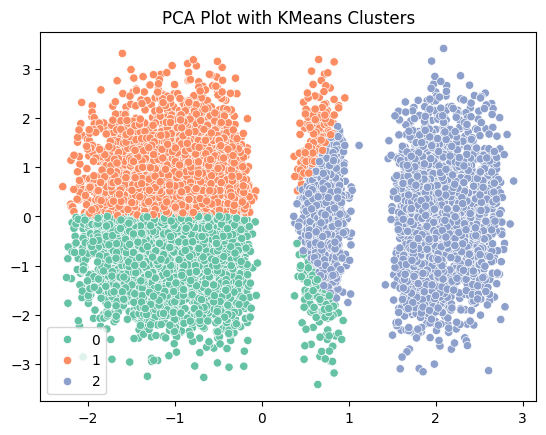

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans clustering (choose the number of clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot with cluster labels
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2')
plt.title("PCA Plot with KMeans Clusters")
plt.show()


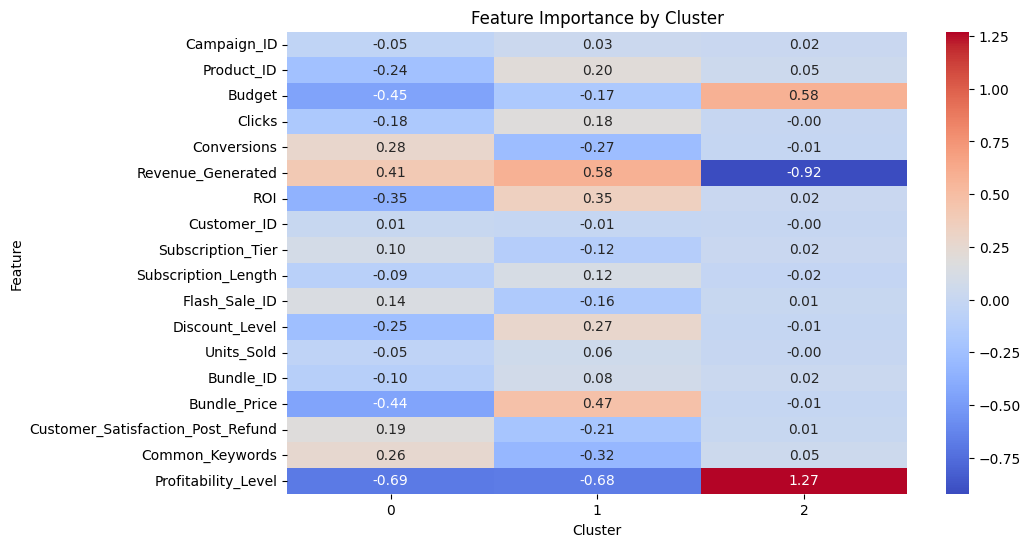

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import numpy as np

# Step 1: Cluster the PCA data
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters to your use case
clusters = kmeans.fit_predict(X_pca)

# Step 2: Add cluster labels back to the original standardized data
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)  # Assuming df.columns contains original feature names
df_scaled['Cluster'] = clusters

# Step 3: Calculate mean feature values for each cluster
cluster_means = df_scaled.groupby('Cluster').mean()

# Step 4: Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Feature Importance by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()
